## Classification based on item attributes
## 基於物品屬性的分類

「協同過濾法」傾向於推薦那些已經很流行的物品。

試想：一個新樂隊發布了專輯，這張專輯還沒有被任何用戶評價或購買過， 那它將永遠不會出現在推薦列表中。這類推薦系統會讓流行的物品更為流行，冷門的物品更無人問津。
- Daniel Fleder & Kartik Hosanagar 2009 《推薦系統對商品分類的影響》

In [1]:
from math import sqrt

users = {"Angelica": {"Blues Traveler": 3.5, "Broken Bells": 2.0, "Norah Jones": 4.5, "Phoenix": 5.0, "Slightly Stoopid": 1.5, "The Strokes": 2.5, "Vampire Weekend": 2.0},
         "Bill":{"Blues Traveler": 2.0, "Broken Bells": 3.5, "Deadmau5": 4.0, "Phoenix": 2.0, "Slightly Stoopid": 3.5, "Vampire Weekend": 3.0},
         "Chan": {"Blues Traveler": 5.0, "Broken Bells": 1.0, "Deadmau5": 1.0, "Norah Jones": 3.0, "Phoenix": 5, "Slightly Stoopid": 1.0},
         "Dan": {"Blues Traveler": 3.0, "Broken Bells": 4.0, "Deadmau5": 4.5, "Phoenix": 3.0, "Slightly Stoopid": 4.5, "The Strokes": 4.0, "Vampire Weekend": 2.0},
         "Hailey": {"Broken Bells": 4.0, "Deadmau5": 1.0, "Norah Jones": 4.0, "The Strokes": 4.0, "Vampire Weekend": 1.0},
         "Jordyn":  {"Broken Bells": 4.5, "Deadmau5": 4.0, "Norah Jones": 5.0, "Phoenix": 5.0, "Slightly Stoopid": 4.5, "The Strokes": 4.0, "Vampire Weekend": 4.0},
         "Sam": {"Blues Traveler": 5.0, "Broken Bells": 2.0, "Norah Jones": 3.0, "Phoenix": 5.0, "Slightly Stoopid": 4.0, "The Strokes": 5.0},
         "Veronica": {"Blues Traveler": 3.0, "Norah Jones": 5.0, "Phoenix": 4.0, "Slightly Stoopid": 2.5, "The Strokes": 3.0}
        }

music = {"Dr Dog/Fate": {"piano": 2.5, "vocals": 4, "beat": 3.5, "blues": 3, "guitar": 5, "backup vocals": 4, "rap": 1},
         "Phoenix/Lisztomania": {"piano": 2, "vocals": 5, "beat": 5, "blues": 3, "guitar": 2, "backup vocals": 1, "rap": 1},
         "Heartless Bastards/Out at Sea": {"piano": 1, "vocals": 5, "beat": 4, "blues": 2, "guitar": 4, "backup vocals": 1, "rap": 1},
         "Todd Snider/Don't Tempt Me": {"piano": 4, "vocals": 5, "beat": 4, "blues": 4, "guitar": 1, "backup vocals": 5, "rap": 1},
         "The Black Keys/Magic Potion": {"piano": 1, "vocals": 4, "beat": 5, "blues": 3.5, "guitar": 5, "backup vocals": 1, "rap": 1},
         "Glee Cast/Jessie's Girl": {"piano": 1, "vocals": 5, "beat": 3.5, "blues": 3, "guitar":4, "backup vocals": 5, "rap": 1},
         "La Roux/Bulletproof": {"piano": 5, "vocals": 5, "beat": 4, "blues": 2, "guitar": 1, "backup vocals": 1, "rap": 1},
         "Mike Posner": {"piano": 2.5, "vocals": 4, "beat": 4, "blues": 1, "guitar": 1, "backup vocals": 1, "rap": 1},
         "Black Eyed Peas/Rock That Body": {"piano": 2, "vocals": 5, "beat": 5, "blues": 1, "guitar": 2, "backup vocals": 2, "rap": 4},
         "Lady Gaga/Alejandro": {"piano": 1, "vocals": 5, "beat": 3, "blues": 2, "guitar": 1, "backup vocals": 2, "rap": 1}}

In [2]:
def manhattan(rating1, rating2):
    """Computes the Manhattan distance. Both rating1 and rating2 are dictionaries
       of the form {'The Strokes': 3.0, 'Slightly Stoopid': 2.5}"""
    distance = 0
    total = 0
    for key in rating1:
        if key in rating2:
            distance += abs(rating1[key] - rating2[key])
            total += 1
    return distance


def computeNearestNeighbor(username, users):
    """creates a sorted list of users based on their distance to username"""
    distances = []
    for user in users:
        if user != username:
            distance = manhattan(users[user], users[username])
            distances.append((distance, user))
    # sort based on distance -- closest first
    distances.sort()
    return distances

In [3]:
computeNearestNeighbor('The Black Keys/Magic Potion', music)

[(4.5, 'Heartless Bastards/Out at Sea'),
 (5.5, 'Phoenix/Lisztomania'),
 (6.5, 'Dr Dog/Fate'),
 (8.0, "Glee Cast/Jessie's Girl"),
 (9.0, 'Mike Posner'),
 (9.5, 'Lady Gaga/Alejandro'),
 (11.5, 'Black Eyed Peas/Rock That Body'),
 (11.5, 'La Roux/Bulletproof'),
 (13.5, "Todd Snider/Don't Tempt Me")]

## 有意義的評分
1分表示完全不是這個樂曲風格，5分則表示很相符。個特徵都是1到5分的尺度，0.5分為一檔。

- 如果一首歌的“鄉村音樂”特徵是4分，另一首是5分，那我們可以認為它們是相似的歌曲。結合之前學過的距離計算公式進行推薦。

一個簡單的示例我選取了以下這些特徵： 
- 鋼琴的程度（Piano）：1分錶示沒有使用鋼琴，5分錶示整首歌曲由鋼琴曲貫穿； 
- 美聲的程度（Vocals）：標準同上 
- 節奏（Driving beat）：整首歌曲是否有強烈的節奏感 
- 藍調（Blues infl.） 
- 電音吉他（Dirty elec. Guitar） 
- 幕後和聲（Backup vocals） 
- 饒舌（Rap infl.） 使用以上標準對一些歌曲進行評分

In [4]:
computeNearestNeighbor('The Black Keys/Magic Potion', music)

[(4.5, 'Heartless Bastards/Out at Sea'),
 (5.5, 'Phoenix/Lisztomania'),
 (6.5, 'Dr Dog/Fate'),
 (8.0, "Glee Cast/Jessie's Girl"),
 (9.0, 'Mike Posner'),
 (9.5, 'Lady Gaga/Alejandro'),
 (11.5, 'Black Eyed Peas/Rock That Body'),
 (11.5, 'La Roux/Bulletproof'),
 (13.5, "Todd Snider/Don't Tempt Me")]

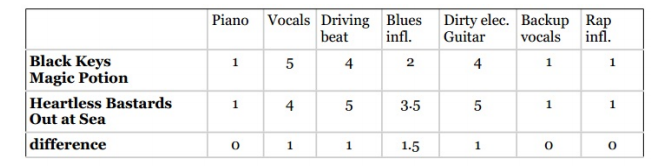

- 這兩首歌曲最相似的地方是鋼琴、和聲、以及饒舌，這些特徵的差異都是0。但這些特徵的評分都很低，我們不能告訴用戶「因為這首歌曲沒有鋼琴伴奏，所以我們推薦給你」。

- 因此，我們需要使用那些相似的且評分較高的特徵。我們推薦歌曲是因為它有著強烈的節奏感，美聲片段，以及電音吉他的演奏。

## Normalize Column 正規化

需要進行標準化的情形： 
- 1. 我們需要通過物品特性來計算距離； 
- 2. 不同特性之間的尺度相差很大。
- 3. 有意義的評分建立於差不多的評分標準，若最大差異懸殊時(ex.加入年齡)，
- 4. 年齡最大差異度是 1-100，但評分最大差異度是 5，年齡會決定了匹配結果

## knn

kNN算法的優點： 
- 實現也比較簡單 不需要按特定形式準備數據
- 需要大量內存保存訓練集數據當我們的訓練集較大時，kNN算法是一個不錯的選擇。
- 這個算法的用途很廣，包括推薦系 統、蛋白質分析、圖片分類等。

應用機會
分類器的應用範圍很廣： 

### 推特情感分類 
很多人在對推特中的文字消息進行情感分類（積極的、消極的），可以有很多用途，如Axe發布了一款新的腋下除臭劑，通過推文就能知道用戶是否滿意。這裡用到的物品特徵是文字信息。

### 人臉識別 
現在有些手機應用可以識別出照片裡你的朋友們，這項技術也可用於監控錄像中的人臉識 別。不同的識別技術細節可能不同，但都會用到諸如五官的大小和相對距離等信息。

### 政治拉票 
將目標選民分為“愛湊熱鬧”、“很有主見”、“家庭為重”等類型，來進行有針對性的拉票活 動。市場細分這和上個例子有點像，與其花費巨額廣告費向不可能購買維加斯公寓的人進行宣傳，不如從人群中識別出潛在客戶，縮小宣傳範圍。最好能再對目標群體進行細分，進一步定制廣告內容。

### 個人健康助理
如今人們越來越關注自身，我們可以購買到像Nike健身手環這樣的產品，而Intel等公司也在研制一種智能家居，可以在你行走時稱出你的重量，記錄你的行動軌跡，並給出健康提示。有些專家還預言未來我們會穿戴各種便攜式設備，收集我們的生活信息，並加以分類。

### 其他
- 識別恐怖分子
- 來信分類（重要的、一般的、垃圾郵件）
- 預測醫療費用 
- 識別金融詐騙

In [5]:
# 向量中特徵依次為：piano, vocals, beat, blues, guitar, backup vocals, rap 
# 定義方式與上方 music 相同，只是較為簡潔

items = {"Dr Dog/Fate": [2.5, 4, 3.5, 3, 5, 4, 1], 
         "Phoenix/Lisztomania": [2, 5, 5, 3, 2, 1, 1], 
         "Heartless Bastards/Out": [1, 5, 4, 2, 4, 1, 1], 
         "Todd Snider/Don't Tempt Me": [4, 5, 4, 4, 1, 5, 1], 
         "The Black Keys/Magic Potion": [1, 4, 5, 3.5, 5, 1, 1], 
         "Glee Cast/Jessie's Girl": [1, 5, 3.5, 3, 4, 5, 1], 
         "La Roux/Bulletproof": [5, 5, 4, 2, 1, 1, 1], 
         "Mike Posner": [2.5, 4, 4, 1, 1, 1, 1], 
         "Black Eyed Peas/Rock That Body": [2, 5, 5, 1, 2, 2, 4], 
         "Lady Gaga/Alejandro": [1, 5, 3, 2, 1, 2, 1]}

In [6]:
## 這裡使用L和 D兩個字母表示喜歡和不喜歡，當然你也可以用 0和1等。

users = {"Angelica": {"Dr Dog/Fate": "L", 
                      "Phoenix/Lisztomania": "L", 
                      "Heartless Bastards/Out at Sea": "D", 
                      "Todd Snider/Don't Tempt Me": "D", 
                      "The Black Keys/Magic Potion": "D", 
                      "Glee Cast/Jessie's Girl": "L", 
                      "La Roux/Bulletproof": "D", 
                      "Mike Posner": "D", 
                      "Black Eyed Peas/Rock That Body": "D", 
                      "Lady Gaga/Alejandro": "L"}, 
         "Bill": {"Dr Dog/Fate": "L", 
                  "Phoenix/Lisztomania": "L", 
                  "Heartless Bastards/Out at Sea": "L", 
                  "Todd Snider/Don't Tempt Me": "D", 
                  "The Black Keys/Magic Potion": "L", 
                  "Glee Cast/Jessie's Girl": "D", 
                  "La Roux/Bulletproof": "D", 
                  "Mike Posner": "D", 
                  "Black Eyed Peas/Rock That Body": "D", 
                  "Lady Gaga/Alejandro": "D"}
        }

In [7]:
def manhattan(vector1, vector2): 
    distance = 0 
    total = 0 
    n = len(vector1) 
    for i in range(n): 
        distance += abs(vector1[i] - vector2[i]) 
    return distance 

def computeNearestNeighbor(itemName, itemVector, items): 
    distances = [] 
    for otherItem in items: 
        if otherItem != itemName: 
            distance = manhattan(itemVector, items[otherItem]) 
            distances.append((distance, otherItem)) 
    # 最近的排在前面 
    distances.sort() 
    return distances

def classify(user, itemName, itemVector): 
    nearest = computeNearestNeighbor(itemName, itemVector, items)[0][1] 
    rating = users[user][nearest] 
    return rating

In [8]:
classify('Angelica', 'Chris Cagle/I Breathe In. I Breathe Out', 
         [1, 5, 2.5, 1, 1, 5 , 1])

'L'

In [9]:
## KNN 計算出 I Breathe In 最接近的歌曲 他可能會喜歡 Lady Gaga/Alejandro
computeNearestNeighbor('Chris Cagle/I Breathe In. I Breathe Out', 
                       [1, 5, 2.5, 1, 1 , 5, 1], 
                       items)

[(4.5, 'Lady Gaga/Alejandro'),
 (6.0, "Glee Cast/Jessie's Girl"),
 (7.5, "Todd Snider/Don't Tempt Me"),
 (8.0, 'Mike Posner'),
 (9.5, 'Heartless Bastards/Out'),
 (10.5, 'Black Eyed Peas/Rock That Body'),
 (10.5, 'Dr Dog/Fate'),
 (10.5, 'La Roux/Bulletproof'),
 (10.5, 'Phoenix/Lisztomania'),
 (14.0, 'The Black Keys/Magic Potion')]

## 如何建立好一個 List

- Comment_________class_________num______num
- AsukaTeramoto____Gymmastics___54_______66
- BrittaineyRaven____Basketball_____72_______162

In [13]:
# 1  Bad
list = {'Asuka Termoto': ('Gymnastics', [54, 66]), 
        'Brittainey Raven': ('Basketball', [72, 162])}

In [14]:
# 2  Normal
list = [['Asuka Termoto', 'Gymnastics', 54, 66], 
        ['Brittainey Raven', 'Basketball', 72, 162]]

In [15]:
#3  Best
list = [('Gymnastics', [54, 66], ['Asuka Termoto']), 
        ('Basketball', [72, 162], ['Brittainey Raven'])]

In [18]:
## 讀取數據轉換成上述格式
import copy
class Classifier:
    def __init__(self, filename):
        self.medianAndDeviation = []
        # reading the data in from the file
        f = open(filename)
        lines = f.readlines()
        f.close()
        self.format = lines[0].strip().split('\t')
        self.data = []
        for line in lines[1:]:
            fields = line.strip().split('\t')
            ignore = []
            vector = []
            for i in range(len(fields)):
                if self.format[i] == 'num':
                    vector.append(int(fields[i]))
                elif self.format[i] == 'comment':
                    ignore.append(fields[i])
                elif self.format[i] == 'class':
                    classification = fields[i]
            self.data.append((classification, vector, ignore))
        self.rawData = copy.deepcopy(self.data)

        
    def getMedian(self, alist):
        if alist == []: 
            return [] 
        blist = sorted(alist) 
        length = len(alist) 
        # 奇數回傳中間值，偶數則均
        if length % 2 == 1: 
            return blist[int(((length + 1) / 2) - 1)] 
        else:
            v1 = blist[int(length / 2)] 
            v2 = blist[(int(length / 2) - 1)] 
            return (v1 + v2) / 2.0

    def getAbsoluteStandardDeviation(self, alist, median):
        sum = 0 
        for item in alist: 
            sum += abs(item - median) 
        return sum / len(alist)

def unitTest():
    list1 = [54, 72, 78, 49, 65, 63, 75, 67, 54]
    list2 = [54, 72, 78, 49, 65, 63, 75, 67, 54, 68]
    list3 = [69]
    list4 = [69, 72]
    classifier = Classifier('input/athletesTrainingSet.txt')
    m1 = classifier.getMedian(list1)
    m2 = classifier.getMedian(list2)
    m3 = classifier.getMedian(list3)
    m4 = classifier.getMedian(list4)
    asd1 = classifier.getAbsoluteStandardDeviation(list1, m1)
    asd2 = classifier.getAbsoluteStandardDeviation(list2, m2)
    asd3 = classifier.getAbsoluteStandardDeviation(list3, m3)
    asd4 = classifier.getAbsoluteStandardDeviation(list4, m4)
    assert(round(m1, 3) == 65)
    assert(round(m2, 3) == 66)
    assert(round(m3, 3) == 69)
    assert(round(m4, 3) == 70.5)
    assert(round(asd1, 3) == 8)
    assert(round(asd2, 3) == 7.5)
    assert(round(asd3, 3) == 0)
    assert(round(asd4, 3) == 1.5)
    print("getMedian and getAbsoluteStandardDeviation work correctly")

unitTest()

getMedian and getAbsoluteStandardDeviation work correctly


## Example

In [23]:
class Classifier:
    def __init__(self, filename):
        self.medianAndDeviation = []
        # reading the data in from the file
        f = open(filename)
        lines = f.readlines()
        f.close()
        self.format = lines[0].strip().split('\t')
        self.data = []
        for line in lines[1:]:
            fields = line.strip().split('\t')
            ignore = []
            vector = []
            for i in range(len(fields)):
                if self.format[i] == 'num':
                    vector.append(float(fields[i]))
                elif self.format[i] == 'comment':
                    ignore.append(fields[i])
                elif self.format[i] == 'class':
                    classification = fields[i]
            self.data.append((classification, vector, ignore))
        self.rawData = copy.deepcopy(self.data)
        # get length of instance vector
        self.vlen = len(self.data[0][1])
        # now normalize the data
        for i in range(self.vlen):
            self.normalizeColumn(i)
    
    
    def getMedian(self, alist):
        """return median of alist"""
        if alist == []:
            return []
        blist = sorted(alist)
        length = len(alist)
        if length % 2 == 1:
            return blist[int(((length + 1) / 2) -  1)]
        else:
            v1 = blist[int(length / 2)]
            v2 =blist[(int(length / 2) - 1)]
            return (v1 + v2) / 2.0
        

    def getAbsoluteStandardDeviation(self, alist, median):
        """given alist and median return absolute standard deviation"""
        sum = 0
        for item in alist:
            sum += abs(item - median)
        return sum / len(alist)


    def normalizeColumn(self, columnNumber):
        """given a column number, normalize that column in self.data"""
        col = [v[1][columnNumber] for v in self.data]
        median = self.getMedian(col)
        asd = self.getAbsoluteStandardDeviation(col, median)
        #print("Median: %f   ASD = %f" % (median, asd))
        self.medianAndDeviation.append((median, asd))
        for v in self.data:
            v[1][columnNumber] = (v[1][columnNumber] - median) / asd


    def normalizeVector(self, v):
        """We have stored the median and asd for each column.
        We now use them to normalize vector v"""
        vector = v
        for i in range(len(vector)):
            (median, asd) = self.medianAndDeviation[i]
            vector[i] = (vector[i] - median) / asd
        return vector
    

    def manhattan(self, vector1, vector2):
        """Computes the Manhattan distance."""
        return sum(map(lambda v1, v2: abs(v1 - v2), vector1, vector2))


    def nearestNeighbor(self, itemVector):
        """return nearest neighbor to itemVector"""
        return min([ (self.manhattan(itemVector, item[1]), item)
                     for item in self.data])
    
    
    def classify(self, itemVector):
        """Return class we think item Vector is in"""
        return(self.nearestNeighbor(self.normalizeVector(itemVector))[1][0])

    
def unitTest():
    classifier = Classifier('athletesTrainingSet.txt')
    br = ('Basketball', [72, 162], ['Brittainey Raven'])
    nl = ('Gymnastics', [61, 76], ['Viktoria Komova'])
    cl = ("Basketball", [74, 190], ['Crystal Langhorne'])
    # first check normalize function
    brNorm = classifier.normalizeVector(br[1])
    nlNorm = classifier.normalizeVector(nl[1])
    clNorm = classifier.normalizeVector(cl[1])
    assert(brNorm == classifier.data[1][1])
    assert(nlNorm == classifier.data[-1][1])
    print('normalizeVector fn OK')
    # check distance
    assert (round(classifier.manhattan(clNorm, classifier.data[1][1]), 5) == 1.16823)
    assert(classifier.manhattan(brNorm, classifier.data[1][1]) == 0)
    assert(classifier.manhattan(nlNorm, classifier.data[-1][1]) == 0)
    print('Manhattan distance fn OK')
    # Brittainey Raven's nearest neighbor should be herself
    result = classifier.nearestNeighbor(brNorm)
    assert(result[1][2]== br[2])
    # Nastia Liukin's nearest neighbor should be herself
    result = classifier.nearestNeighbor(nlNorm)
    assert(result[1][2]== nl[2])
    # Crystal Langhorne's nearest neighbor is Jennifer Lacy"
    assert(classifier.nearestNeighbor(clNorm)[1][2][0] == "Jennifer Lacy")
    print("Nearest Neighbor fn OK")
    # Check if classify correctly identifies sports
    assert(classifier.classify(br[1]) == 'Basketball')
    assert(classifier.classify(cl[1]) == 'Basketball')
    assert(classifier.classify(nl[1]) == 'Gymnastics')
    print('Classify fn OK')

def test(training_filename, test_filename):
    """Test the classifier on a test set of data"""
    classifier = Classifier(training_filename)
    f = open(test_filename)
    lines = f.readlines()
    f.close()
    numCorrect = 0.0
    for line in lines:
        data = line.strip().split('\t')
        vector = []
        classInColumn = -1
        for i in range(len(classifier.format)):
            if classifier.format[i] == 'num':
                vector.append(float(data[i]))
            elif classifier.format[i] == 'class':
                classInColumn = i
        theClass= classifier.classify(vector)
        prefix = '-'
        if theClass == data[classInColumn]:
            # it is correct
            numCorrect += 1
            prefix = '+'
        print("%s  %12s  %s" % (prefix, theClass, line))
    print("%4.2f%% correct" % (numCorrect * 100/ len(lines)))
    
## Here are examples
#test('input/athletesTrainingSet.txt', 'input/athletesTestSet.txt') #準確率是 80%
#test("input/irisTrainingSet.txt", "input/irisTestSet.txt") #準確度 93.33%
test("input/mpgTrainingSet.txt", "input/mpgTestSet.txt") #準確度 56%

+            15  15	8	390.0	190.0	3850	8.5	amc ambassador dpl

+            15  15	8	383.0	170.0	3563	10.0	dodge challenger se

+            15  15	8	340.0	160.0	3609	8.0	plymouth 'cuda 340

-            20  15	8	400.0	150.0	3761	9.5	chevrolet monte carlo

+            15  15	8	455.0	225.0	3086	10.0	buick estate wagon (sw)

+            25  25	4	113.0	95.00	2372	15.0	toyota corona mark ii

-            25  20	6	198.0	95.00	2833	15.5	plymouth duster

-            25  20	6	199.0	97.00	2774	15.5	amc hornet

+            20  20	6	200.0	85.00	2587	16.0	ford maverick

-            35  25	4	97.00	88.00	2130	14.5	datsun pl510

+            25  25	4	97.00	46.00	1835	20.5	volkswagen 1131 deluxe sedan

+            25  25	4	110.0	87.00	2672	17.5	peugeot 504

-            35  25	4	107.0	90.00	2430	14.5	audi 100 ls

-            30  25	4	104.0	95.00	2375	17.5	saab 99e

-            20  25	4	121.0	113.0	2234	12.5	bmw 2002

+            20  20	6	199.0	90.00	2648	15.0	amc gremlin

-            15  10	

In [ ]:
##有一個身高 73吋 體重 160 磅的人，最有可能的運動
cl = Classifier('input/athletesTrainingSet.txt')
cl.classify([73, 160])

In [ ]:
##有一個身高 59吋 體重 90 磅的人，最有可能的運動
cl.classify([59, 90])